In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from collections import Counter
mlp.rcParams['axes.unicode_minus'] = False
mlp.rcParams['font.family'] = "AppleGothic"

In [2]:
import sys
sys.path.append('../modules/')
from trans_date import trans_date

In [3]:
data = pd.read_csv('./실습데이터.csv')
data['거래일자'] = data['거래일자'].apply(trans_date)
data

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31 23:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:10,-,239000,CARD,239000,-,239000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022-01-01 00:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01 00:01:12,-,385000,CARD,385000,-,385000,-
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01 00:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022-01-02 11:01:24,-,289000,VBANK,289000,-,289000,-


In [4]:
data.columns

Index(['거래id', '유형', '고객id', '코스ID', '사이트', '포맷', '카테고리', '코스(상품) 이름', '거래일자',
       '쿠폰이름', '판매가격', '결제수단', '실거래금액', '쿠폰할인액', '거래금액', '환불금액'],
      dtype='object')

In [9]:
# '고객id' 별로 그룹을 묶고, 각 그룹의 크기를 계산
group_sizes = data.groupby('고객id').size()

# 'Customer_Type' 컬럼을 설정
df_new = data.copy()
for idx, row in df_new.iterrows():
    if group_sizes[row['고객id']] >= 2:
        df_new.loc[idx, 'cus_type'] = 'cus_rep'
    else:
        df_new.loc[idx, 'cus_type'] = 'cus_comm'

In [11]:
df_new = df_new.sort_values(by=['거래일자'])
df_new.reset_index(drop=True, inplace=True)

In [14]:
## 판매가격을 int로 변환
df_new['판매가격'] = pd.to_numeric(df_new['판매가격'], errors='coerce').astype('Int64')
df_new['쿠폰할인액'] = pd.to_numeric(df_new['쿠폰할인액'], errors='coerce').astype('Int64')
df_new['거래금액'] = pd.to_numeric(df_new['거래금액'], errors='coerce').astype('Int64')
df_new['환불금액'] = pd.to_numeric(df_new['환불금액'], errors='coerce').astype('Int64')
df_new['거래id'] = pd.to_numeric(df_new['거래id'], errors='coerce').astype('str')
df_new['고객id'] = pd.to_numeric(df_new['고객id'], errors='coerce').astype('str')
df_new['코스ID'] = pd.to_numeric(df_new['코스ID'], errors='coerce').astype('str')

In [94]:
# cus_type이 cus_rep인 value를 선택하고 cus_type제거, index를 초기화한 dataframe 생성
df_rep = df_new[df_new['cus_type'] == 'cus_rep']
df_rep = df_rep.drop('cus_type', axis=1)
df_rep = df_rep.reset_index(drop=False, inplace=False)

In [21]:
df_rep_sorted = df_rep.sort_values(['고객id', '거래일자'])

# 이전 거래일자와의 차이 계산
df_rep_sorted['재구매간격'] = df_rep_sorted.groupby('고객id')['거래일자'].diff()

# 재구매간격 출력
print(df_rep_sorted[['고객id', '거래일자', '재구매간격']])

         고객id                거래일자             재구매간격
5339       10 2022-01-07 21:01:42               NaT
45347      10 2022-05-08 23:05:51 121 days 02:04:09
48366      10 2022-05-23 13:05:09  14 days 13:59:18
57705      10 2022-06-25 10:06:22  32 days 21:01:13
58010      10 2022-06-26 14:06:43   1 days 04:00:21
...       ...                 ...               ...
10347   99998 2022-01-19 23:01:40   2 days 09:00:00
40166   99998 2022-04-19 21:04:03  89 days 22:02:23
70110   99998 2022-07-27 04:07:04  98 days 07:03:01
102018  99998 2022-10-25 13:10:19  90 days 09:03:15
113608  99998 2022-11-30 17:11:51  36 days 04:01:32

[126975 rows x 3 columns]


In [22]:
# '포맷' 컬럼을 추가하여 정렬
df_rep_sorted['포맷'] = df_rep_sorted.groupby('고객id')['포맷'].ffill()

# 이전 거래일자와의 차이 계산
df_rep_sorted['재구매간격'] = df_rep_sorted.groupby('고객id')['거래일자'].diff()

# 재구매 기간을 포맷에 따라 그룹화하여 평균 재구매 기간 계산
df_repurchase_period = df_rep_sorted.groupby('포맷')['재구매간격'].mean()

# 결과 출력
print(df_repurchase_period)

포맷
RED   96 days 06:24:48.761553273
올인원   98 days 03:14:53.339597991
Name: 재구매간격, dtype: timedelta64[ns]


In [23]:
# 고객id와 거래일자로 그룹화하고 정렬
df_rep_sorted = df_rep.sort_values(['고객id', '거래일자'])

# 이전 거래일자와의 차이 계산
df_rep_sorted['재구매간격'] = df_rep_sorted.groupby('고객id')['거래일자'].diff()

# 포맷에 따라 재구매간격 분류
df_rep_sorted['재구매간격_포맷'] = pd.cut(df_rep_sorted['재구매간격'].dt.days, bins=[-np.inf, 7, 30, 90, np.inf], labels=['1주일 이내', '1개월 이내', '3개월 이내', '3개월 이후'])

# 재구매간격 출력
print(df_rep_sorted[['고객id', '거래일자', '재구매간격', '재구매간격_포맷']])

         고객id                거래일자             재구매간격 재구매간격_포맷
5339       10 2022-01-07 21:01:42               NaT      NaN
45347      10 2022-05-08 23:05:51 121 days 02:04:09   3개월 이후
48366      10 2022-05-23 13:05:09  14 days 13:59:18   1개월 이내
57705      10 2022-06-25 10:06:22  32 days 21:01:13   3개월 이내
58010      10 2022-06-26 14:06:43   1 days 04:00:21   1주일 이내
...       ...                 ...               ...      ...
10347   99998 2022-01-19 23:01:40   2 days 09:00:00   1주일 이내
40166   99998 2022-04-19 21:04:03  89 days 22:02:23   3개월 이내
70110   99998 2022-07-27 04:07:04  98 days 07:03:01   3개월 이후
102018  99998 2022-10-25 13:10:19  90 days 09:03:15   3개월 이내
113608  99998 2022-11-30 17:11:51  36 days 04:01:32   3개월 이내

[126975 rows x 4 columns]


In [24]:
# 고객id와 거래일자로 그룹화하고 정렬
df_rep_sorted = df_rep.sort_values(['고객id', '거래일자'])

# 이전 거래일자와의 차이 계산
df_rep_sorted['재구매간격'] = df_rep_sorted.groupby('고객id')['거래일자'].diff()

# 포맷에 따라 재구매간격 분류
df_rep_sorted['포맷'] = df_rep_sorted.groupby('고객id')['포맷'].ffill()
df_rep_sorted['재구매간격_포맷'] = df_rep_sorted.groupby('포맷')['재구매간격'].transform(lambda x: pd.cut(x.dt.days, bins=[-np.inf, 7, 30, 90, np.inf], labels=['1주일 이내', '1개월 이내', '3개월 이내', '3개월 이후']))

# 재구매간격 출력
print(df_rep_sorted[['고객id', '거래일자', '포맷', '재구매간격', '재구매간격_포맷']])


         고객id                거래일자   포맷             재구매간격 재구매간격_포맷
5339       10 2022-01-07 21:01:42  올인원               NaT      NaN
45347      10 2022-05-08 23:05:51  올인원 121 days 02:04:09   3개월 이후
48366      10 2022-05-23 13:05:09  올인원  14 days 13:59:18   1개월 이내
57705      10 2022-06-25 10:06:22  RED  32 days 21:01:13   3개월 이내
58010      10 2022-06-26 14:06:43  올인원   1 days 04:00:21   1주일 이내
...       ...                 ...  ...               ...      ...
10347   99998 2022-01-19 23:01:40  올인원   2 days 09:00:00   1주일 이내
40166   99998 2022-04-19 21:04:03  올인원  89 days 22:02:23   3개월 이내
70110   99998 2022-07-27 04:07:04  올인원  98 days 07:03:01   3개월 이후
102018  99998 2022-10-25 13:10:19  올인원  90 days 09:03:15   3개월 이내
113608  99998 2022-11-30 17:11:51  RED  36 days 04:01:32   3개월 이내

[126975 rows x 5 columns]


In [25]:
# '포맷' 컬럼 값에 따라 데이터프레임 분할
df_format_올인원 = df_rep_sorted[df_rep_sorted['포맷'] == '올인원']
df_format_더레드 = df_rep_sorted[df_rep_sorted['포맷'] == 'RED']

In [28]:
total_sales_올인원 = df_format_올인원['거래금액'].sum()
total_sales_올인원

17787608151

In [29]:
total_sales_더레드 = df_format_더레드['거래금액'].sum()
total_sales_더레드

2008456390

In [ ]:
# '유형' 컬럼 값이 'PAYMENT'인 데이터프레임 추출
df_payment = df_format_올인원[df_format_올인원['유형'] == 'PAYMENT']

# 거래횟수 계산
transaction_count_올인원 = df_format_올인원['유형'].count()

# 매출 계산
total_sales_올인원 = df_format_올인원['거래금액'].sum()

print("거래횟수:", transaction_count)
print("매출:", total_sales)

거래횟수: 117056
매출: 18267186133


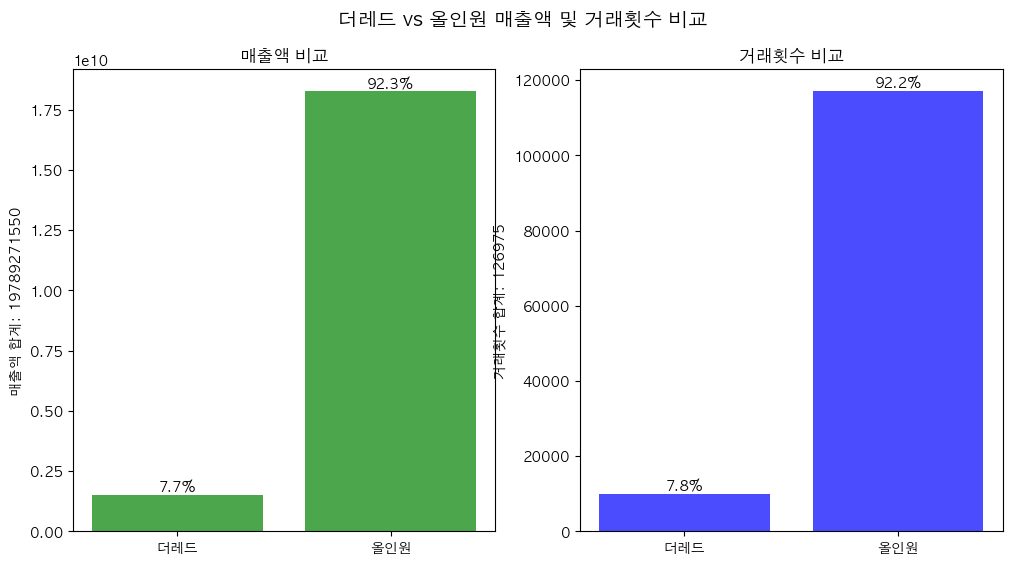

In [ ]:
# 서브플롯 설정
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 왼쪽 그래프: 매출액 비교
axes[0].bar(['더레드', '올인원'], [total_sales_더레드, total_sales_올인원], color='g', alpha=0.7)
axes[0].set_title('매출액 비교')
axes[0].set_ylabel('매출액 합계: {}'.format(total_sales_더레드 + total_sales_올인원))

# 왼쪽 그래프 내부에 비율 표시
for i, v in enumerate([total_sales_더레드, total_sales_올인원]):
    axes[0].text(i, v, '{:.1%}'.format(v / (total_sales_더레드 + total_sales_올인원)), ha='center', va='bottom')

# 오른쪽 그래프: 거래횟수 비교
axes[1].bar(['더레드', '올인원'], [transaction_count_더레드, transaction_count_올인원], color='b', alpha=0.7)
axes[1].set_title('거래횟수 비교')
axes[1].set_ylabel('거래횟수 합계: {}'.format(transaction_count_더레드 + transaction_count_올인원))

# 오른쪽 그래프 내부에 비율 표시
for i, v in enumerate([transaction_count_더레드, transaction_count_올인원]):
    axes[1].text(i, v, '{:.1%}'.format(v / (transaction_count_더레드 + transaction_count_올인원)), ha='center', va='bottom')

# 전체 그래프 제목
fig.suptitle('더레드 vs 올인원 매출액 및 거래횟수 비교', fontsize=14)

# 그래프 출력
plt.show()


In [ ]:
df_format_더레드 = df_format_더레드.drop(['index'], axis=1)
df_format_올인원 = df_format_올인원.drop(['index'], axis=1)
df_format_더레드 = df_format_더레드.sort_values('거래일자')
df_format_올인원 = df_format_올인원.sort_values('거래일자')
df_format_더레드 = df_format_더레드.reset_index(drop=True)
df_format_올인원 = df_format_올인원.reset_index(drop=True)

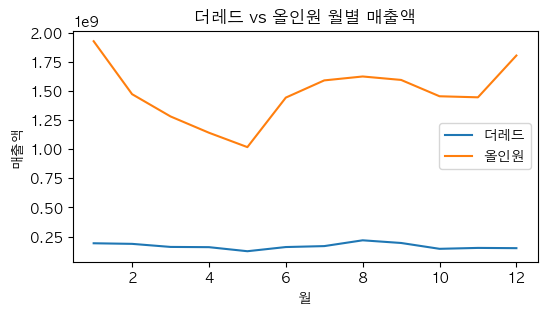

In [95]:
monthly_sales_더레드 = df_format_더레드.groupby(df_format_더레드['거래일자'].dt.month)['거래금액'].sum()
monthly_sales_올인원 = df_format_올인원.groupby(df_format_올인원['거래일자'].dt.month)['거래금액'].sum()
plt.figure(figsize=(6, 3))
plt.plot(monthly_sales_더레드.index, monthly_sales_더레드.values, label='더레드')
plt.plot(monthly_sales_올인원.index, monthly_sales_올인원.values, label='올인원')
plt.xlabel('월')
plt.ylabel('매출액')
plt.title('더레드 vs 올인원 월별 매출액')
plt.legend()

plt.show()

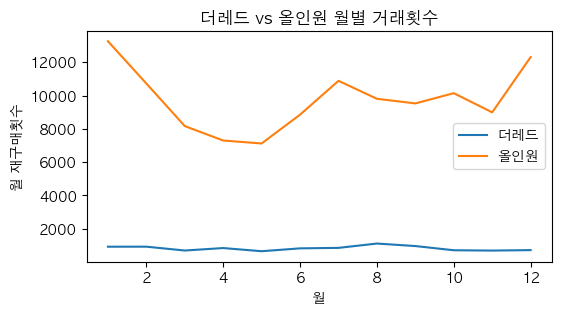

In [96]:
# 월별 매출 데이터 계산
monthly_rep_더레드 = df_format_더레드.groupby(df_format_더레드['거래일자'].dt.month)['거래id'].count()
monthly_rep_올인원 = df_format_올인원.groupby(df_format_올인원['거래일자'].dt.month)['거래id'].count()

# 막대 그래프 그리기
plt.figure(figsize=(6, 3))
plt.plot(monthly_rep_더레드.index, monthly_rep_더레드.values, label='더레드')
plt.plot(monthly_rep_올인원.index, monthly_rep_올인원.values, label='올인원')

plt.xlabel('월')
plt.ylabel('월 재구매횟수')
plt.title('더레드 vs 올인원 월별 거래횟수')
plt.legend()

plt.show()

In [98]:
df_rep_sorted = df_rep.sort_values(by=['고객id', '거래일자'])
df_rep_sorted['재구매기간'] = df_rep_sorted.groupby('고객id')['거래일자'].diff()
#df_rep_sorted[['고객id', '거래일자', '재구매기간']].head(50)

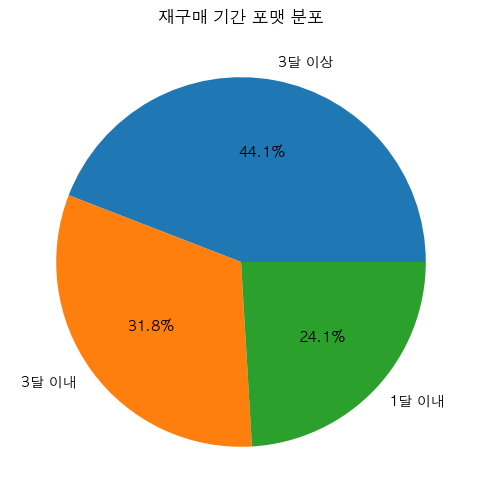

In [99]:
df_rep_sorted['재구매기간(일)'] = df_rep_sorted['재구매기간'].dt.days
df_rep_sorted['재구매포맷'] = pd.cut(df_rep_sorted['재구매기간(일)'], bins=[-np.inf, 30, 90, np.inf], labels=['1달 이내', '3달 이내', '3달 이상'])
format_counts = df_rep_sorted['재구매포맷'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(format_counts, labels=format_counts.index, autopct='%1.1f%%')
plt.title('재구매 기간 포맷 분포')
plt.show()

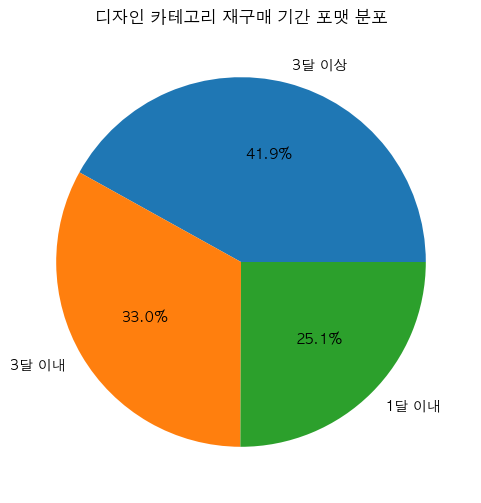

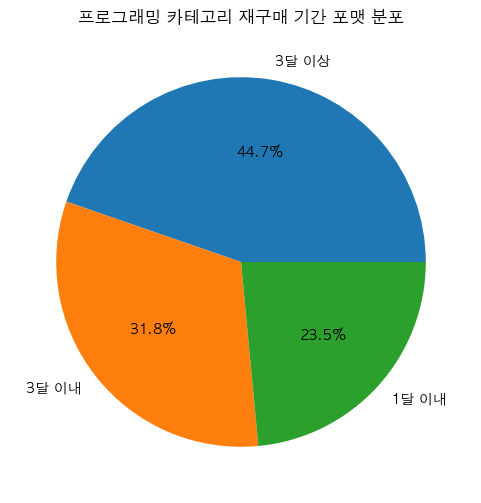

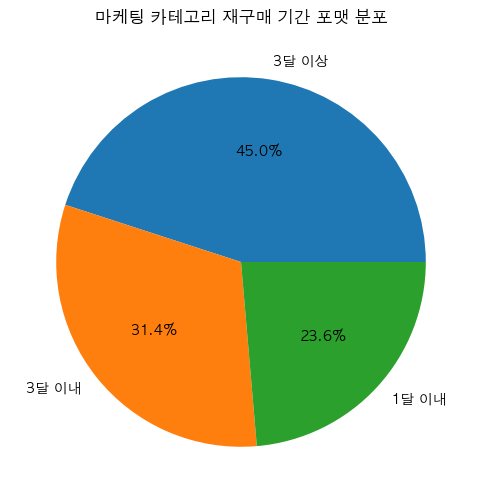

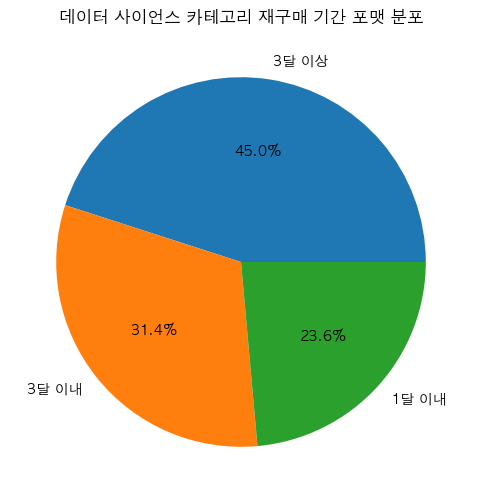

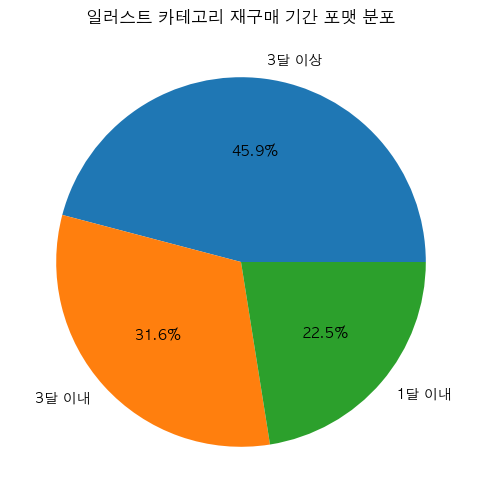

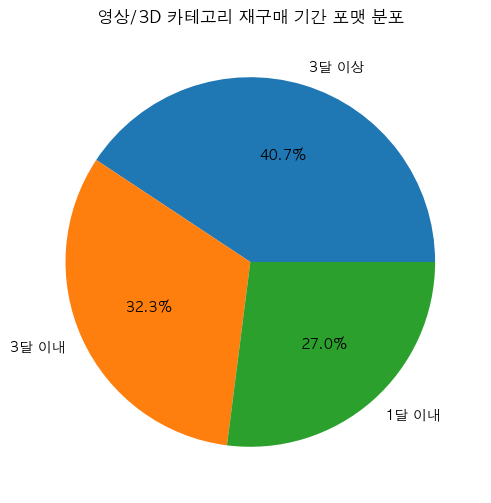

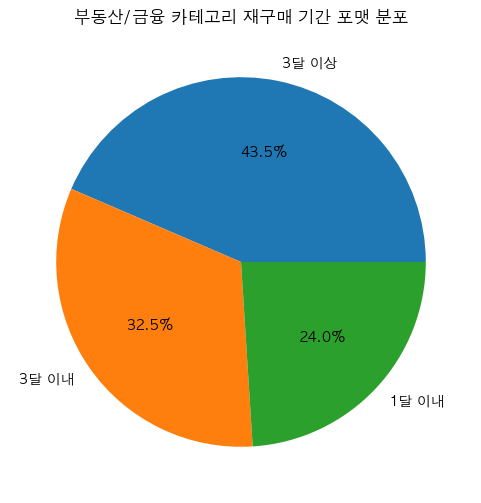

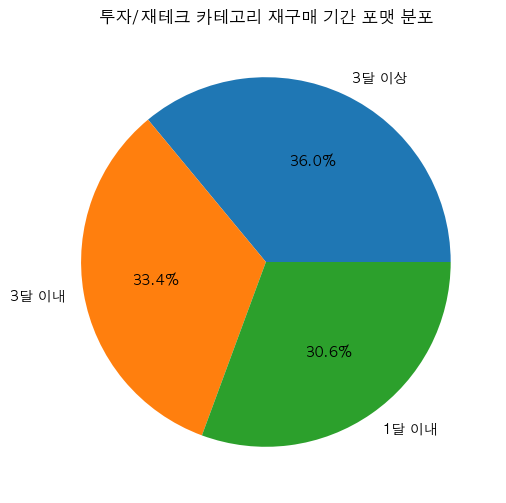

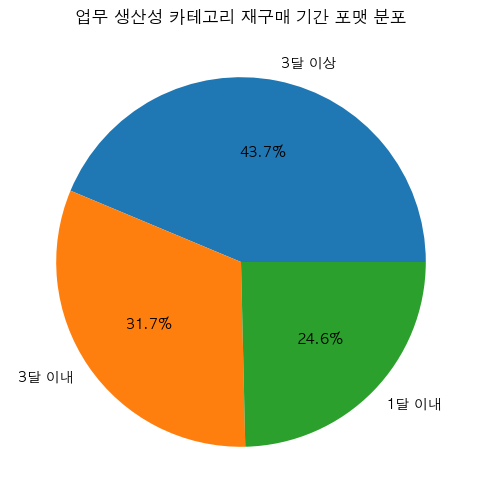

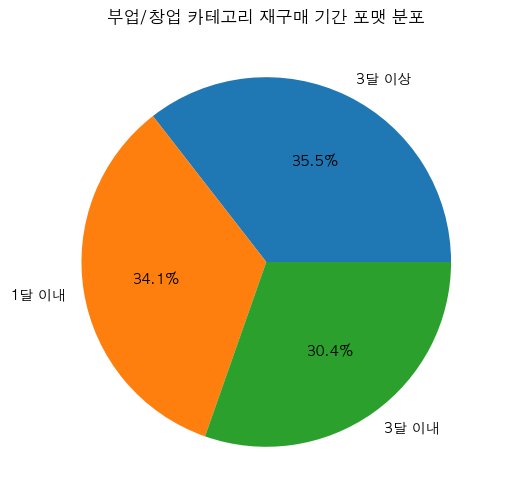

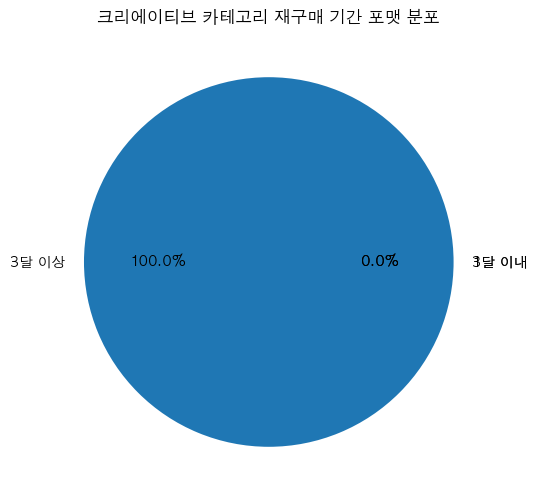

In [100]:
# '카테고리'별 재구매 기간 포맷 분포 파이 차트 출력
unique_categories = df_rep_sorted['카테고리'].unique()

# 각 카테고리별로 파이 차트 그리기
for category in unique_categories:
    category_data = df_rep_sorted[df_rep_sorted['카테고리'] == category]
    format_counts = category_data['재구매포맷'].value_counts()
    
    # 파이 차트 그리기
    plt.figure(figsize=(6, 6))
    plt.pie(format_counts, labels=format_counts.index, autopct='%1.1f%%')
    plt.title(f'{category} 카테고리 재구매 기간 포맷 분포')
    plt.show()



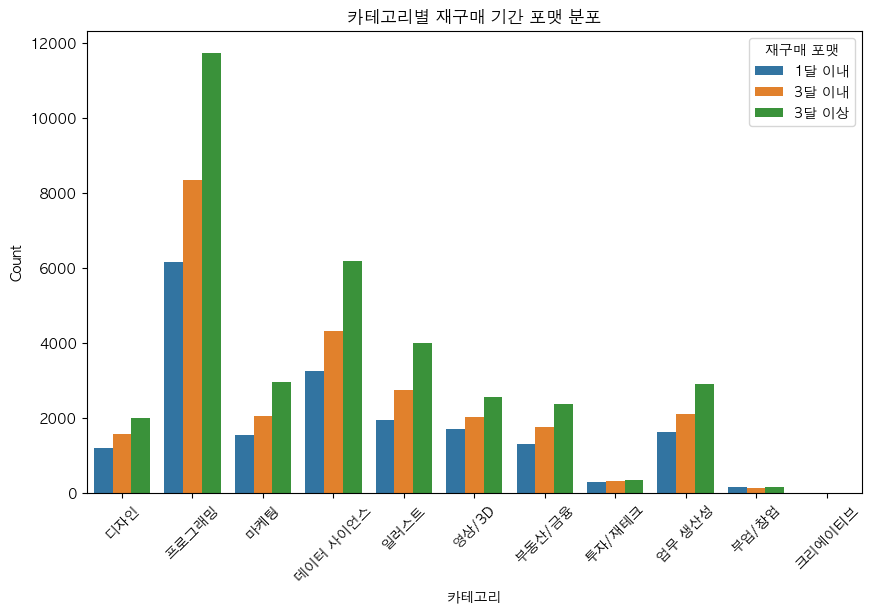

In [101]:
import seaborn as sns

# '카테고리'별 재구매 기간 포맷 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df_rep_sorted, x='카테고리', hue='재구매포맷')
plt.title('카테고리별 재구매 기간 포맷 분포')
plt.xlabel('카테고리')
plt.ylabel('Count')
plt.legend(title='재구매 포맷')
plt.xticks(rotation=45)
plt.show()


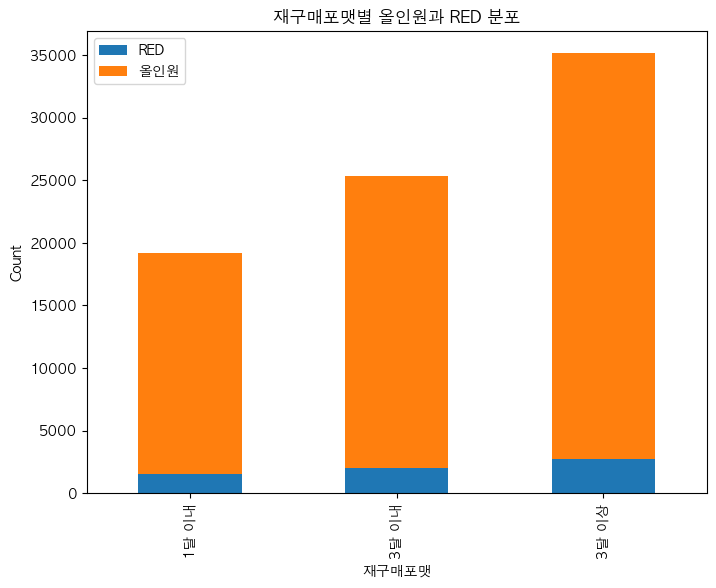

In [102]:
# 재구매포맷과 포맷으로 그룹화하여 카운트 계산
format_counts = df_rep_sorted.groupby(['재구매포맷', '포맷']).size().unstack()

# 막대그래프 그리기
format_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('재구매포맷별 올인원과 RED 분포')
plt.xlabel('재구매포맷')
plt.ylabel('Count')
plt.legend()
plt.show()


In [103]:
# '고객id'와 '거래일자'에 따라 정렬
df_rep_sorted = df_rep.sort_values(by=['고객id', '거래일자'])

# 이전 거래일자와의 차이 계산
df_rep_sorted['재구매기간'] = df_rep_sorted.groupby('고객id')['거래일자'].diff()

# 재구매 횟수 계산
df_rep_sorted['재구매횟수'] = df_rep_sorted['재구매기간'].notnull().astype(int)

In [57]:
# '재구매기간'이 NaT가 아닌 데이터 추출
df_rep_valid = df_rep_sorted.dropna(subset=['재구매기간'])
df_rep_valid
    # '거래일자'를 월별로 변환
df_rep_valid['월'] = df_rep_valid['거래일자'].dt.to_period('M')
df_rep_valid['월'] = df_rep_valid['월'].apply(lambda x: str(x.to_timestamp()))
df_rep_valid
    # 월별 재구매기간 카운트
#df_monthly_repurchase = df_rep_valid.groupby('월')['재구매기간'].count()

    # 월별 재구매기간 꺾은선 그래프 그리기
#plt.plot(df_monthly_repurchase.index, df_monthly_repurchase.values, marker='o')
#plt.xlabel('월')
#plt.ylabel('재구매 횟수')
#plt.title('월별 재구매 횟수')
#plt.xticks(rotation=45)
#plt.show()

/var/folders/2p/96glgh9n1w3069gwxq0gdvyr0000gn/T/ipykernel_11801/1845751876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rep_valid['월'] = df_rep_valid['거래일자'].dt.to_period('M')
/var/folders/2p/96glgh9n1w3069gwxq0gdvyr0000gn/T/ipykernel_11801/1845751876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rep_valid['월'] = df_rep_valid['월'].apply(lambda x: str(x.to_timestamp()))


,index,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,재구매기간,재구매횟수,월
45347,57006,1840950,PAYMENT,10,205949,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 30개 프로젝트로 배우는 iOS 앱 개발 with Swift,2022-05-08 23:05:51,-,192000,CARD,192000,<NA>,192000,<NA>,121 days 02:04:09,1,2022-05-01 00:00:00
48366,60808,1864937,PAYMENT,10,211160,FASTCAMPUS,올인원,프로그래밍,실무 프로젝트로 배우는 Kotlin & Spring : 리팩토링부터 서비스 구현까지,2022-05-23 13:05:09,[20% 할인쿠폰] 실무 프로젝트로 배우는 Kotlin & Spring: 리팩토링부...,149000,CARD,119200,29800,119200,<NA>,14 days 13:59:18,1,2022-05-01 00:00:00
57705,72523,1933897,PAYMENT,10,204670,FASTCAMPUS,RED,마케팅,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,2022-06-25 10:06:22,-,194000,CARD,194000,<NA>,194000,<NA>,32 days 21:01:13,1,2022-06-01 00:00:00
58010,72898,1935879,PAYMENT,10,205548,FASTCAMPUS,올인원,데이터 사이언스,초격차 패키지 : 한 번에 끝내는 데이터 분석,2022-06-26 14:06:43,[증정] 온라인강의 6월 판매가 50%할인권,176000,CARD,88000,88000,88000,<NA>,1 days 04:00:21,1,2022-06-01 00:00:00
63132,79329,1969997,PAYMENT,10,206185,FASTCAMPUS,올인원,데이터 사이언스,초격차 패키지 : 한 번에 끝내는 머신러닝과 데이터분석 A-Z,2022-07-08 15:07:02,-,247000,TRANS,247000,<NA>,247000,<NA>,12 days 01:00:19,1,2022-07-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10347,13052,1605603,PAYMENT,99998,205578,FASTCAMPUS,올인원,투자/재테크,올인원 패키지 : 박민수에게 배우는 직장인 초현실 투자 전략,2022-01-19 23:01:40,-,310000,POINT,310000,<NA>,310000,<NA>,2 days 09:00:00,1,2022-01-01 00:00:00
40166,50553,1800180,PAYMENT,99998,204373,FASTCAMPUS,올인원,업무 생산성,초격차 패키지 : 일잘러 필수 스킬 모음.zip,2022-04-19 21:04:03,패캐머_온라인 쿠폰,159000,PROMOTION,0,159000,0,<NA>,89 days 22:02:23,1,2022-04-01 00:00:00
70110,88037,2015453,PAYMENT,99998,211160,FASTCAMPUS,올인원,프로그래밍,실무 프로젝트로 배우는 Kotlin & Spring : 리팩토링부터 서비스 구현까지,2022-07-27 04:07:04,-,160000,CARD,160000,<NA>,160000,<NA>,98 days 07:03:01,1,2022-07-01 00:00:00
102018,128013,2227340,REFUND,99998,207488,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 머신러닝 서비스 구축을 위한 실전 MLOps,2022-10-25 13:10:19,-,396000,CARD,-99000,<NA>,<NA>,-99000,90 days 09:03:15,1,2022-10-01 00:00:00


/var/folders/2p/96glgh9n1w3069gwxq0gdvyr0000gn/T/ipykernel_11801/2083318874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rep_valid['월'] = df_rep_valid['거래일자'].dt.to_period('M')
/var/folders/2p/96glgh9n1w3069gwxq0gdvyr0000gn/T/ipykernel_11801/2083318874.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rep_valid['월'] = df_rep_valid['월'].apply(lambda x: str(x))


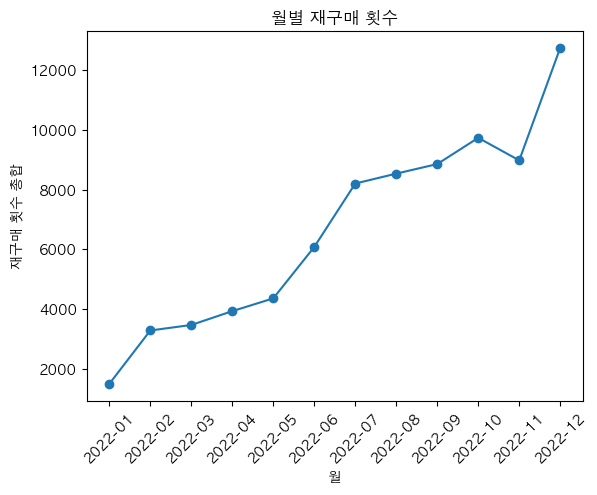

In [58]:
# '재구매기간'이 NaT가 아닌 데이터 추출
df_rep_valid = df_rep_sorted.dropna(subset=['재구매기간'])

# '거래일자'를 월별로 변환하여 '월' 컬럼 생성
df_rep_valid['월'] = df_rep_valid['거래일자'].dt.to_period('M')
df_rep_valid['월'] = df_rep_valid['월'].apply(lambda x: str(x))

# '월' 컬럼을 기준으로 정렬
df_rep_valid = df_rep_valid.sort_values('월')

# 월별 재구매 횟수 계산
df_monthly_repurchase = df_rep_valid.groupby('월').size()

# 월별 재구매 횟수 꺾은선 그래프 그리기
plt.plot(df_monthly_repurchase.index, df_monthly_repurchase.values, marker='o')
plt.xlabel('월')
plt.ylabel('재구매 횟수 총합')
plt.title('월별 재구매 횟수')
plt.xticks(rotation=45)
plt.show()


In [67]:
df_monthly_repurchase

월
2022-01     1497
2022-02     3285
2022-03     3470
2022-04     3933
2022-05     4361
2022-06     6084
2022-07     8208
2022-08     8540
2022-09     8860
2022-10     9739
2022-11     8983
2022-12    12753
dtype: int64

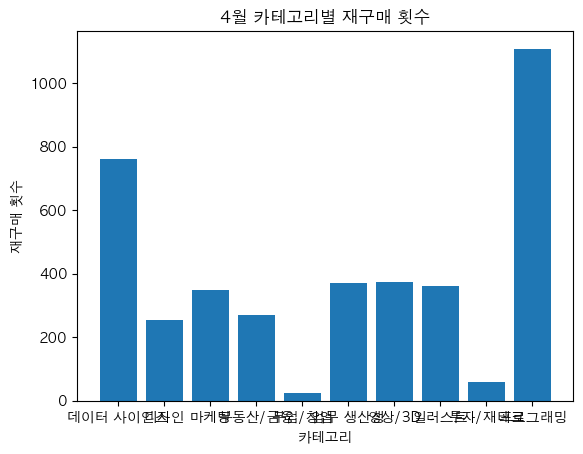

In [78]:
input_month = int(input("Input month (1-12): "))
if input_month in month_group.groups:
    input_data = month_group.get_group(input_month)
    category_counts = input_data.groupby('카테고리').size()

    # 막대 그래프 그리기
    plt.bar(category_counts.index, category_counts.values)
    plt.xlabel('카테고리')
    plt.ylabel('재구매 횟수')
    plt.title(f'{input_month}월 카테고리별 재구매 횟수')
    plt.show()
else:
    print("No data available for the input month.")


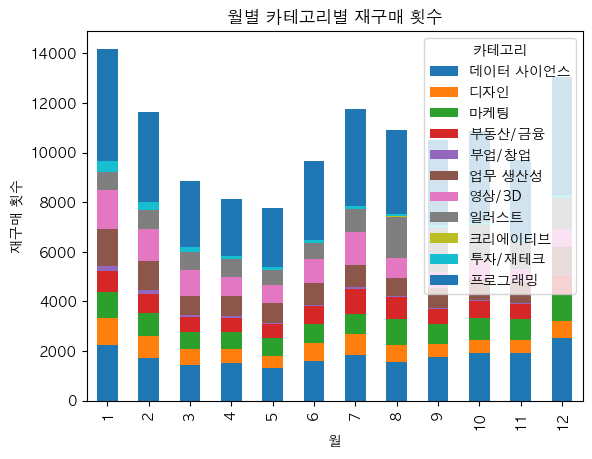

In [88]:
df_rep_sorted['월'] = df_rep_sorted['거래일자'].dt.month
category_counts = df_rep_sorted.groupby(['월', '카테고리']).size().unstack().fillna(0)
category_counts.plot(kind='bar', stacked=True)
plt.xlabel('월')
plt.ylabel('재구매 횟수')
plt.title('월별 카테고리별 재구매 횟수')
plt.legend(title='카테고리')
plt.show()


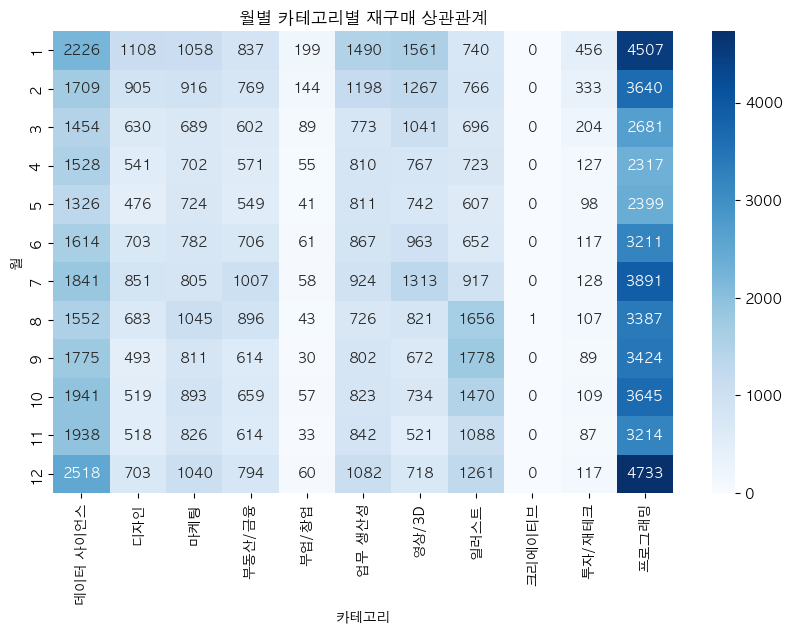

In [91]:
import seaborn as sns

category_counts = df_rep_sorted.groupby(['월', '카테고리']).size().unstack().fillna(0)

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(category_counts, cmap='Blues', annot=True, fmt='g')
plt.xlabel('카테고리')
plt.ylabel('월')
plt.title('월별 카테고리별 재구매 상관관계')
plt.show()


In [79]:
# '고객id'를 기준으로 그룹화하여 재구매 횟수 계산
df_rep_grouped = df_rep.groupby('고객id').size().reset_index(name='재구매 횟수')

# 재구매 횟수의 평균 계산
average_repurchase = df_rep_grouped['재구매 횟수'].mean()

# 결과 출력
print("평균 재구매 횟수:", average_repurchase)

평균 재구매 횟수: 2.6866192712961787


In [80]:
# '고객id'와 '카테고리'를 기준으로 그룹화하여 재구매 횟수 계산
df_rep_grouped = df_rep.groupby(['고객id', '카테고리']).size().reset_index(name='재구매 횟수')

# 결과 출력
print(df_rep_grouped)

         고객id      카테고리  재구매 횟수
0          10  데이터 사이언스       2
1          10       디자인       1
2          10       마케팅       1
3          10      일러스트       1
4          10     프로그래밍       2
...       ...       ...     ...
107496  99998  데이터 사이언스       2
107497  99998       디자인       1
107498  99998    업무 생산성       1
107499  99998    투자/재테크       1
107500  99998     프로그래밍       1

[107501 rows x 3 columns]


In [81]:
# 각 카테고리별 평균 재구매 횟수 계산
average_repurchase_by_category = df_rep_grouped.groupby('카테고리')['재구매 횟수'].mean()

# 결과 출력
print(average_repurchase_by_category)

카테고리
데이터 사이언스    1.185632
디자인         1.066649
마케팅         1.085091
부동산/금융      1.066980
부업/창업       1.006944
업무 생산성      1.091978
영상/3D       1.090089
일러스트        1.103923
크리에이티브      1.000000
투자/재테크      1.014403
프로그래밍       1.375637
Name: 재구매 횟수, dtype: float64


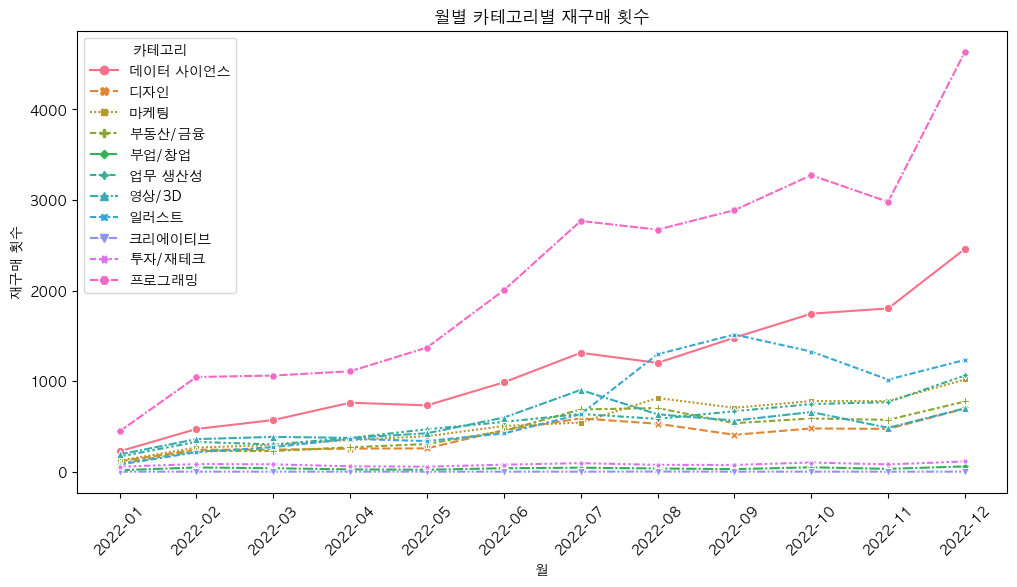

In [90]:
import seaborn as sns

# 월별 카테고리별 재구매 횟수 계산
df_monthly_category_repurchase = df_rep_valid.groupby(['월', '카테고리']).size().unstack().fillna(0)

# stack 그래프 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly_category_repurchase, markers=True)
plt.xlabel('월')
plt.ylabel('재구매 횟수')
plt.title('월별 카테고리별 재구매 횟수')
plt.xticks(rotation=45)
plt.legend(title='카테고리')
plt.show()


In [93]:
# '더레드' 고객의 구매횟수 계산
df_red_repurchase = df_rep[df_rep['포맷'] == 'RED'].groupby('고객id').size().reset_index(name='재구매 횟수_더레드')
average_repurchase_red = df_red_repurchase['재구매 횟수_더레드'].mean()

# '올인원' 고객의 구매횟수 계산
df_allinone_repurchase = df_rep[df_rep['포맷'] == '올인원'].groupby('고객id').size().reset_index(name='재구매 횟수_올인원')
average_repurchase_allinone = df_allinone_repurchase['재구매 횟수_올인원'].mean()

# 결과 출력
print("더레드 고객의 평균 구매횟수:", average_repurchase_red)
print("올인원 고객의 평균 구매횟수:", average_repurchase_allinone)

더레드 고객의 평균 구매횟수: 1.0805010893246187
올인원 고객의 평균 구매횟수: 2.4853181596212233
